In [1]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Load Dataset

df = pd.read_csv('M1_final.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
# Statistical overview of the data

df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [4]:
# Data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [5]:
# Table columns

df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

In [6]:
# Rename the columns

df = df.rename(columns={'OP_UNIQUE_CARRIER':'Operating_Carrier', 'TAIL_NUM':'Tail_Number', 'sch_dep':'Scheduled_Departure', 'sch_arr':'Scheduled_Arrival', 'TAXI_OUT':'Taxi_Out', 'MONTH':'Month', 'DAY_OF_MONTH':'Day_of_Month', 'DEST':'Destination', 'DAY_OF_WEEK':'Day_of_Week', 'CRS_ELAPSED_TIME':'Elapsed_Time_Flight', 'DISTANCE':'Distance','CRS_ARR_M': 'Arrival_Times', 'CRS_DEP_M': 'Schedule_Depart_Time', 'DEP_DELAY':'Delay_of_Departure', 'CRS_ARR_M':'Arrive_Time', 'CRS_DEP_M':'Schedule_Departure_Time', 'DEP_TIME_M':'Actual_Departure_Time'})
df.columns


Index(['Month', 'Day_of_Month', 'Day_of_Week', 'Operating_Carrier',
       'Tail_Number', 'Destination', 'Delay_of_Departure',
       'Elapsed_Time_Flight', 'Distance', 'Schedule_Departure_Time',
       'Actual_Departure_Time', 'Arrive_Time', 'Temperature', 'Dew Point',
       'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition',
       'Scheduled_Departure', 'Scheduled_Arrival', 'Taxi_Out'],
      dtype='object')

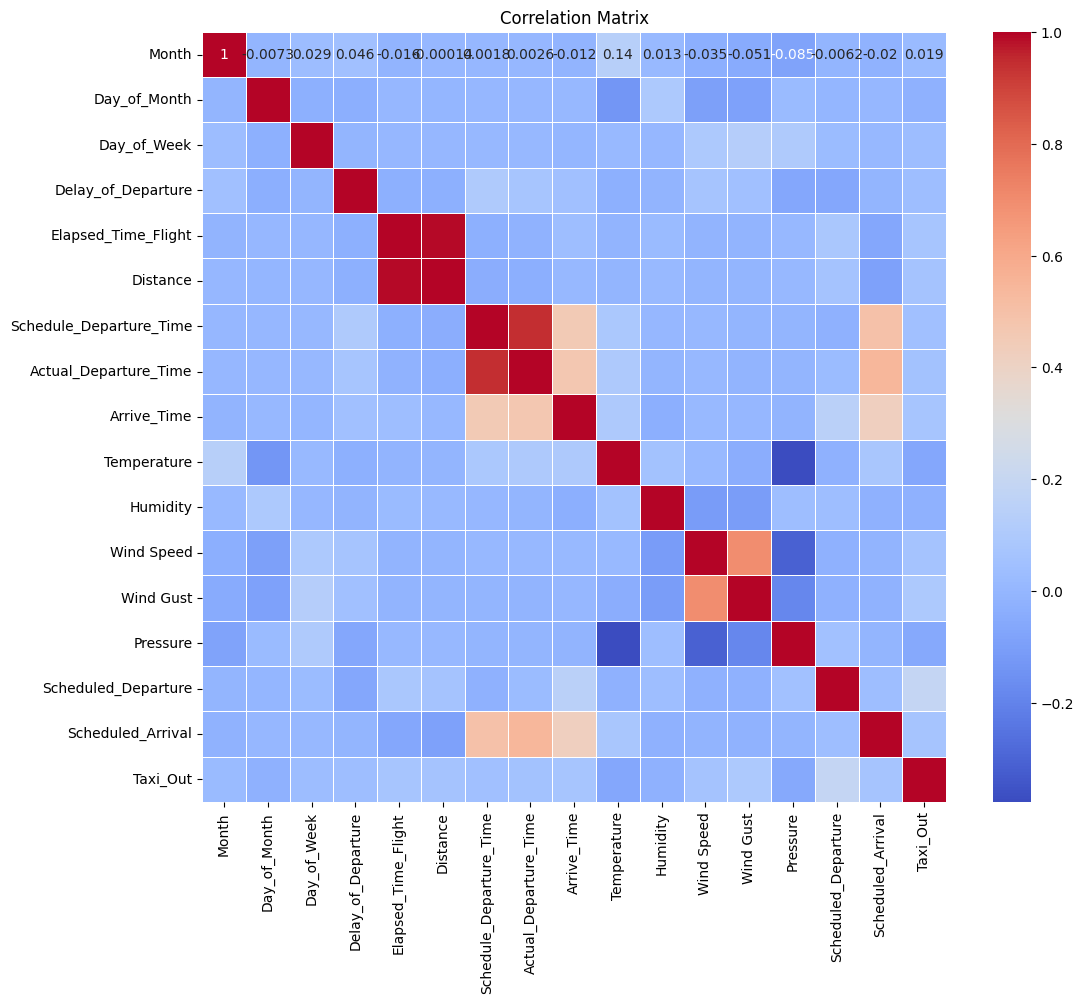

In [7]:
#Create a correlation Matrix

numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

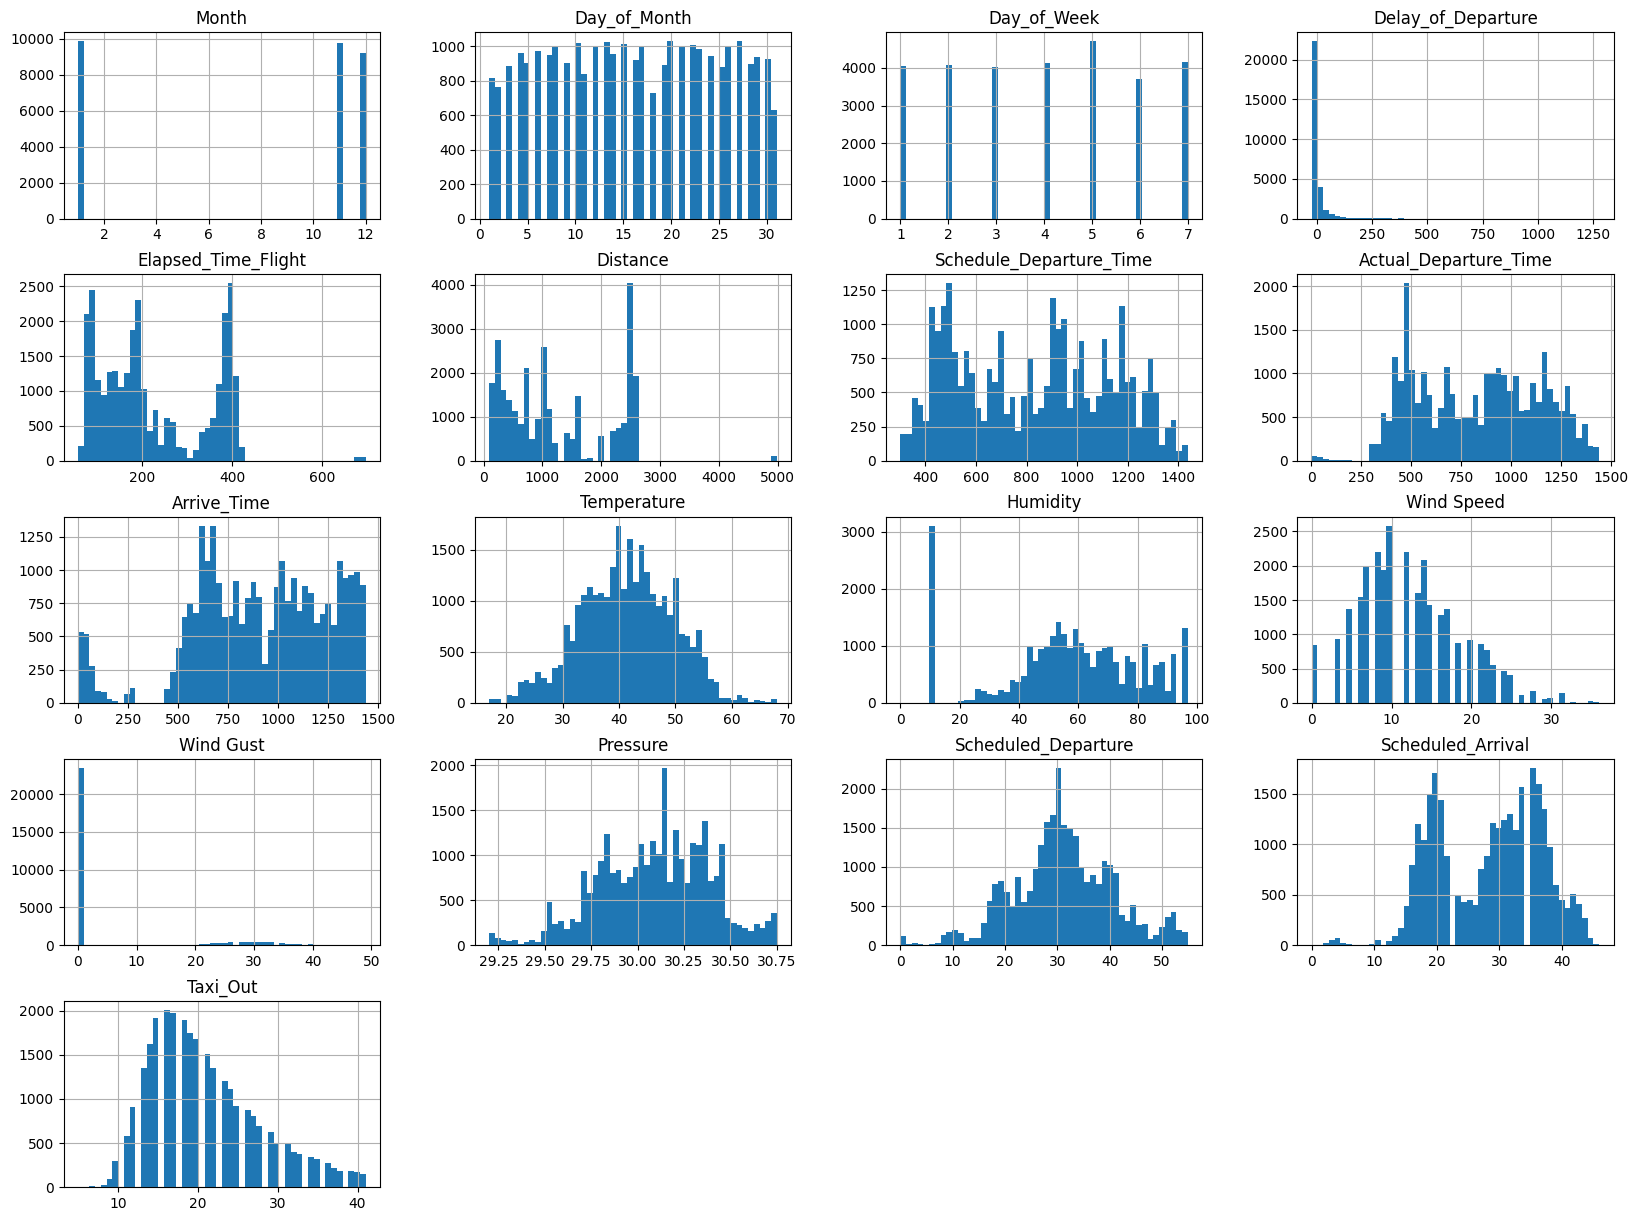

In [8]:
# Create Histogrm of Data

df.hist(bins=50, figsize=(20, 15))
plt.show

In [10]:
df.columns

Index(['Month', 'Day_of_Month', 'Day_of_Week', 'Operating_Carrier',
       'Tail_Number', 'Destination', 'Delay_of_Departure',
       'Elapsed_Time_Flight', 'Distance', 'Schedule_Departure_Time',
       'Actual_Departure_Time', 'Arrive_Time', 'Temperature', 'Dew Point',
       'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition',
       'Scheduled_Departure', 'Scheduled_Arrival', 'Taxi_Out'],
      dtype='object')

In [11]:
# Selecting Variables
X = df[['Schedule_Departure_Time', 'Wind Speed', 'Elapsed_Time_Flight']]
y = df['Taxi_Out']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

Text(0.5, 0, 'Departure Time')

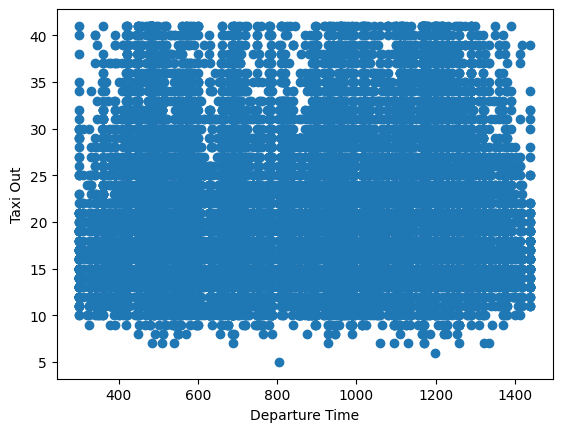

In [12]:
# Create Scatter plot
 
plt.scatter(df['Schedule_Departure_Time'],y)
plt.ylabel('Taxi Out')
plt.xlabel('Departure Time')

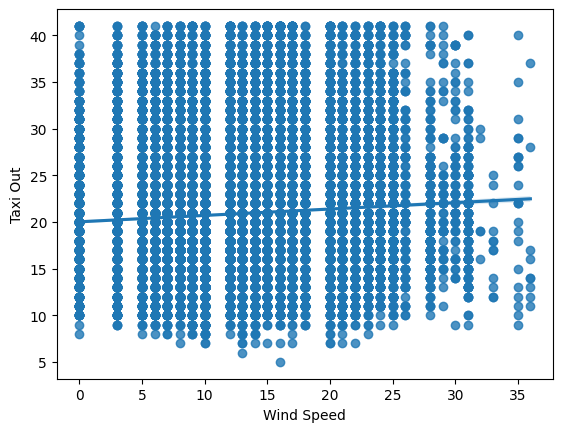

In [13]:
sns.regplot(x=df['Wind Speed'], y=y)
plt.ylabel('Taxi Out')
plt.xlabel('Wind Speed')
plt.show()


Text(0.5, 0, 'Wind Gust')

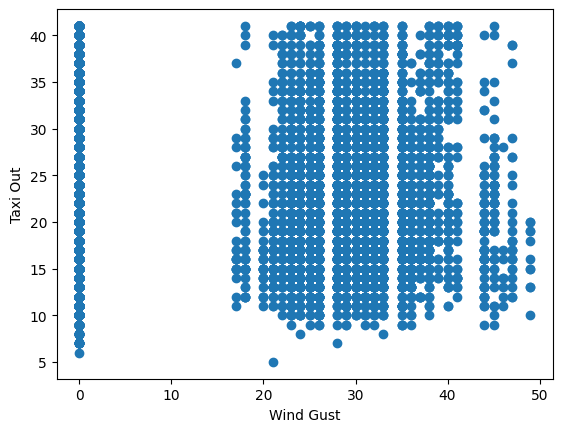

In [14]:
plt.scatter(df['Wind Gust'],y)
plt.ylabel('Taxi Out')
plt.xlabel('Wind Gust')

Text(0.5, 0, 'Elapsed_Time_Flight')

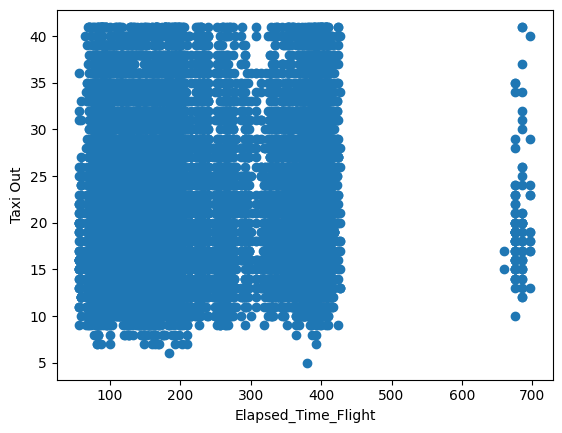

In [15]:
plt.scatter(df['Elapsed_Time_Flight'],y)
plt.ylabel('Taxi Out')
plt.xlabel('Elapsed_Time_Flight')

Text(0.5, 0, 'Arrive_Time')

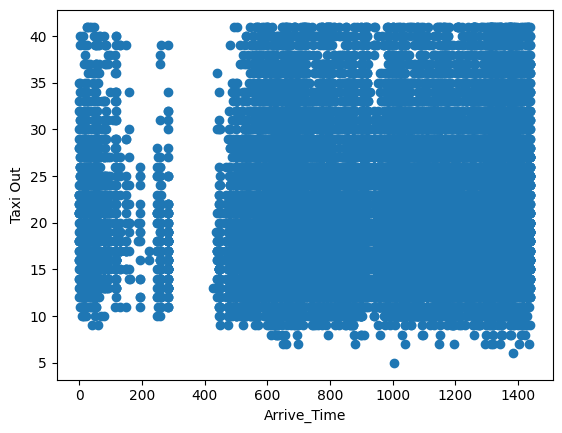

In [16]:
plt.scatter(df['Arrive_Time'],y)
plt.ylabel('Taxi Out')
plt.xlabel('Arrive_Time')

In [17]:
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Linear Regression Model

LR = LinearRegression()

LR.fit(X_train, y_train)

# Predict taxi times for the test data
y_pred = LR.predict(X_test)

In [19]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})

,Actual,Predicted
9362,23,21.852457
23840,14,22.137810
24617,22,21.666955
24899,19,21.849972
2007,20,20.461630
...,...,...
25685,18,20.381150
376,16,19.894236
10922,34,21.612583
7106,17,20.823607


In [20]:
# Linear Regression Model Evaluation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('LR MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('LR MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('LR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('LR R2:', metrics.r2_score(y_test, y_pred_lr))


LR MAE: 5.534512726920926
LR MSE: 47.3481372985061
LR RMSE: 6.880998277757821
LR R2: 0.012130829542834065


In [21]:
# Lasso Model Findings

model_lasso = Lasso(alpha=0.10)
model_ridge = Ridge(alpha=10)

model_lasso.fit(X_train,y_train)
model_ridge.fit(X_train,y_train)

NameError: name 'Lasso' is not defined

In [ ]:
y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

In [ ]:
## Lasso model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('Lasso MAE:', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Lasso MSE:', metrics.mean_squared_error(y_test, y_pred_lasso))
print('Lasso RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('Lasso R2:', metrics.r2_score(y_test, y_pred_lasso))



Lasso MAE: 5.536023856752989
Lasso MSE: 47.40157933459339
Lasso RMSE: 6.884880488039962
Lasso R2: 0.011015817572579412


In [ ]:
## Ridge model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('Ridge MAE:', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Ridge MSE:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('Ridge RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('Ridge R2:', metrics.r2_score(y_test, y_pred_ridge))

Ridge MAE: 5.534511764195343
Ridge MSE: 47.34816638122234
Ridge RMSE: 6.881000391020359
Ridge R2: 0.012130222762495646


In [ ]:
cv=RepeatedKFold(n_splits=2, n_repeats=1, random_state=32)

model = RidgeCV(alphas=(0.5,1,0.01), cv=cv, scoring = 'neg_mean_absolute_error')
                
model.fit(X_test,y_test)

RidgeCV(alphas=(0.5, 1, 0.01),
        cv=RepeatedKFold(n_repeats=1, n_splits=2, random_state=32),
        scoring='neg_mean_absolute_error')

In [ ]:
print('alpha:%f' % model.alpha_)

alpha:1.000000


In [ ]:
df.columns

Index(['Month', 'Day_of_Month', 'Day_of_Week', 'Operating_Carrier',
       'Tail_Number', 'Destination', 'Delay_of_Departure',
       'Elapsed_Time_Flight', 'Distance', 'Schedule_Departure_Time',
       'Actual_Departure_Time', 'Arrive_Time', 'Temperature', 'Dew Point',
       'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition',
       'Scheduled_Departure', 'Scheduled_Arrival', 'Taxi_Out'],
      dtype='object')

In [ ]:
df['F_DELAYED'] = np.where(df['Delay_of_Departure'] > 0, 1, 0)

df['F_EARLY'] = np.where(df['Delay_of_Departure'] < 0, 1, 0)

df['F_ONTIME'] = np.where(df['Delay_of_Departure'] == 0, 1, 0)


In [ ]:
early = df['F_EARLY'].sum()
delayed = df['F_DELAYED'].sum()
ontime = df['F_ONTIME'].sum()
total = df.shape[0]
p_early = early / total * 100
p_delayed = delayed / total * 100
p_ontime = ontime / total * 100

print("Flights are {0:.2f} percent ontime, {1:.2f} percent delayed and {2:.2f} percent early."
.format(p_ontime, p_delayed, p_early))

Flights are 5.09 percent ontime, 27.08 percent delayed and 67.83 percent early.


In [ ]:
df["Condition"].value_counts()

Condition
Mostly Cloudy            9124
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy              918
Partly Cloudy / Windy     582
Rain                      351
Cloudy / Windy            341
Light Rain / Windy        288
Light Drizzle             194
Fog                       147
Wintry Mix                 83
Light Snow                 76
Heavy Rain                 54
Fog / Windy                28
Rain / Windy               25
Light Snow / Windy         24
Light Drizzle / Windy      18
Heavy Rain / Windy          6
Drizzle and Fog             5
Light Freezing Rain         4
Wintry Mix / Windy          4
Snow                        2
Name: count, dtype: int64

<Axes: ylabel='Condition'>

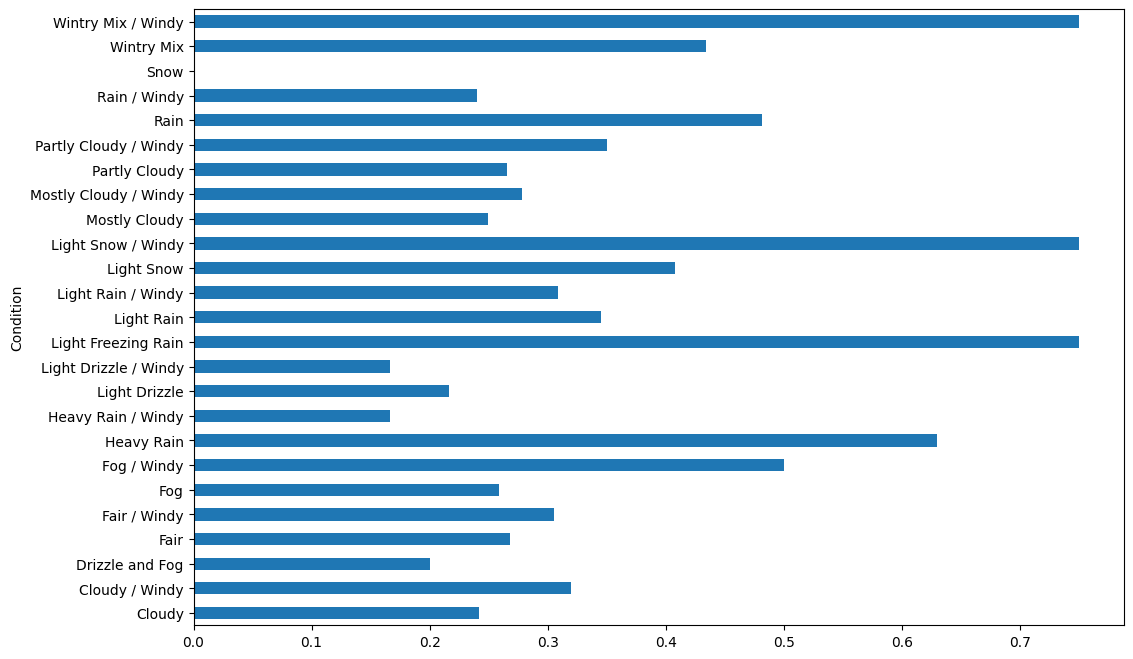

In [ ]:

plt.figure(figsize=(12,8))
df.groupby('Condition')['F_DELAYED'].mean().plot(kind="barh")

In [ ]:
df["Operating_Carrier"].value_counts()

Operating_Carrier
3    9589
4    7680
0    4485
1    3595
2    1111
6    1045
8     914
7     311
5      90
Name: count, dtype: int64

In [ ]:
df["Wind"].value_counts()

Wind
W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: count, dtype: int64